In [1]:
import tensorflow as tf
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
y_train, y_test = y_train.flatten(), y_test.flatten()

In [6]:
K = len(set(y_train))
K

10

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train[0].shape),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(K, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [10]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 151s 97ms/step - loss: 0.5552 - accuracy: 0.8084 - val_loss: 0.6624 - val_accuracy: 0.7794
Epoch 2/10
1563/1563 [==============================] - 156s 100ms/step - loss: 0.4830 - accuracy: 0.8324 - val_loss: 0.6525 - val_accuracy: 0.7854
Epoch 3/10
1563/1563 [==============================] - 154s 98ms/step - loss: 0.4260 - accuracy: 0.8533 - val_loss: 0.7715 - val_accuracy: 0.7611
Epoch 4/10
1563/1563 [==============================] - 134s 86ms/step - loss: 0.3883 - accuracy: 0.8660 - val_loss: 0.7237 - val_accuracy: 0.7725
Epoch 5/10
1563/1563 [==============================] - 141s 90ms/step - loss: 0.3473 - accuracy: 0.8794 - val_loss: 0.6603 - val_accuracy: 0.8016
Epoch 6/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.3131 - accuracy: 0.8917 - val_loss: 0.5938 - val_accuracy: 0.8121
Epoch 7/10
1563/1563 [==============================] - 145s 93ms/step - loss: 0.2824 - accuracy: 0.9024 - val_loss: 

## Here, the model is overfitting so more traning data was provided with the code cell below.

In [12]:
## fit with data augmentation 
batch_size = 32
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=.1, 
    height_shift_range=.1,
    horizontal_flip=True
)
train_generator = data_gen.flow(x_train, y_train, batch_size=batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=10)

Epoch 1/10
1562/1562 [==============================] - 150s 96ms/step - loss: 0.5945 - accuracy: 0.7995 - val_loss: 0.5935 - val_accuracy: 0.8035
Epoch 2/10
1562/1562 [==============================] - 150s 96ms/step - loss: 0.5641 - accuracy: 0.8114 - val_loss: 0.6634 - val_accuracy: 0.7998
Epoch 3/10
1562/1562 [==============================] - 157s 101ms/step - loss: 0.5399 - accuracy: 0.8174 - val_loss: 0.5614 - val_accuracy: 0.8147
Epoch 4/10
1562/1562 [==============================] - 146s 93ms/step - loss: 0.5155 - accuracy: 0.8253 - val_loss: 0.6378 - val_accuracy: 0.7947
Epoch 5/10
1562/1562 [==============================] - 141s 90ms/step - loss: 0.5013 - accuracy: 0.8310 - val_loss: 0.5461 - val_accuracy: 0.8284
Epoch 6/10
1562/1562 [==============================] - 209s 134ms/step - loss: 0.4910 - accuracy: 0.8330 - val_loss: 0.6537 - val_accuracy: 0.7884
Epoch 7/10
1562/1562 [==============================] - 151s 97ms/step - loss: 0.4698 - accuracy: 0.8418 - val_loss:

In [13]:
p_test = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 9s 28ms/step


In [14]:
cm = confusion_matrix(y_test, p_test)
print('The confusion matrix is: ')
cm

The confusion matrix is: 


array([[905,  16,  18,   4,   3,   0,   7,  19,  10,  18],
       [  7, 961,   0,   0,   0,   1,   0,   1,   6,  24],
       [ 51,   5, 736,  27,  31,  47,  59,  34,   1,   9],
       [ 18,   9,  43, 585,  32, 146,  73,  69,   6,  19],
       [ 18,   1,  34,  15, 750,  35,  50,  95,   1,   1],
       [ 12,   6,  11,  60,  15, 792,  22,  75,   2,   5],
       [  9,   6,  17,  20,   6,  13, 912,  10,   3,   4],
       [  5,   2,  10,   7,   8,  15,   8, 940,   0,   5],
       [ 89,  25,   3,   1,   3,   3,   4,   4, 843,  25],
       [ 20,  60,   1,   4,   0,   2,   0,  11,   4, 898]])

In [15]:
print('The accuracy score is %s'%(np.round(accuracy_score(y_test, p_test) * 100, 2)))

The accuracy score is 83.22


In [17]:
def plot(one, two):
    plt.plot(r.history[one], label = one)
    plt.plot(r.history[two], label = two)
    plt.legend()
    plt.show()

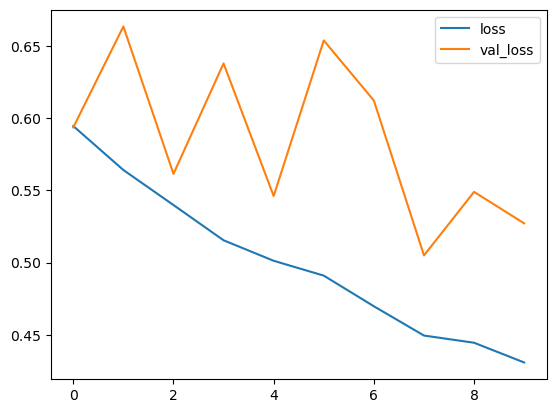

In [18]:
plot(one='loss', two='val_loss')

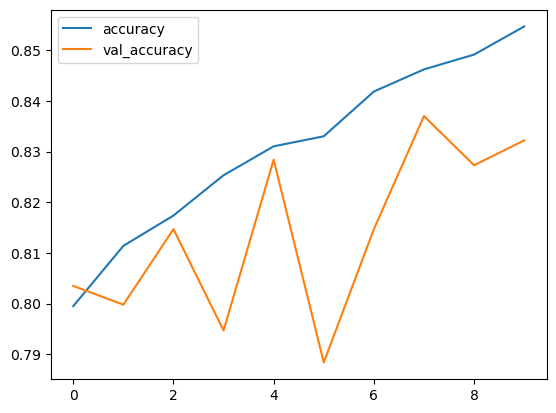

In [19]:
plot('accuracy', 'val_accuracy')

In [25]:
incorrect_index = np.where(y_test!=p_test)[0]
correct_index = np.where(y_test==p_test)[0]
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
def final_plot(index):
    for _ in range(5):
        i = np.random.choice(index)
        plt.imshow(x_test[i], cmap='gray')
        plt.title('True label: %s, Predicted label: %s'%(class_names[y_test[i]], class_names[p_test[i]]))
        plt.axis('off')
        plt.show();

## Some of the correct predictions 

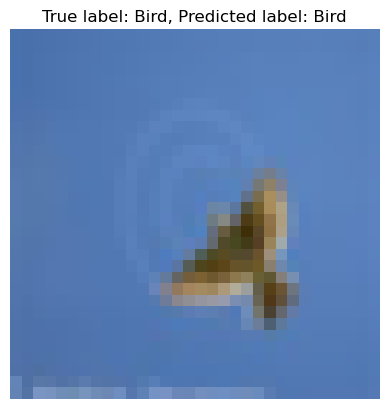

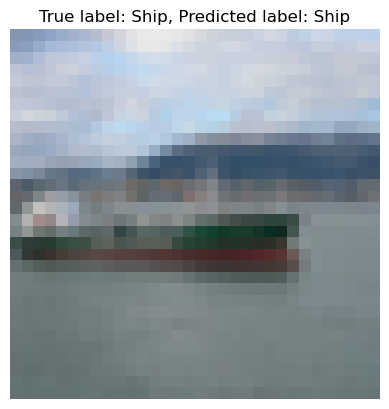

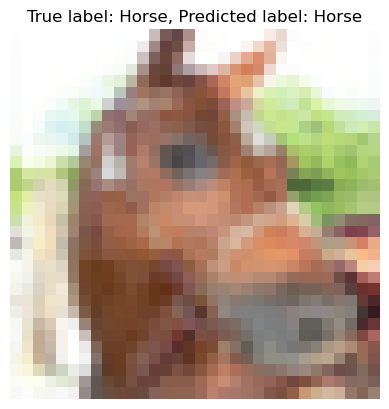

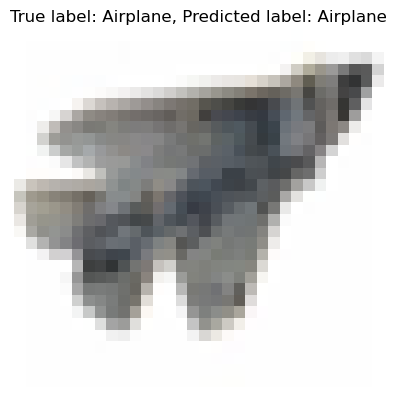

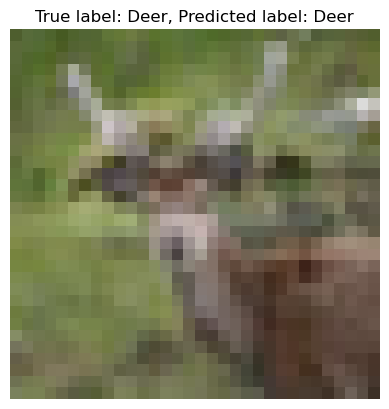

In [27]:
final_plot(correct_index)

## Some of the incorrect predictions 

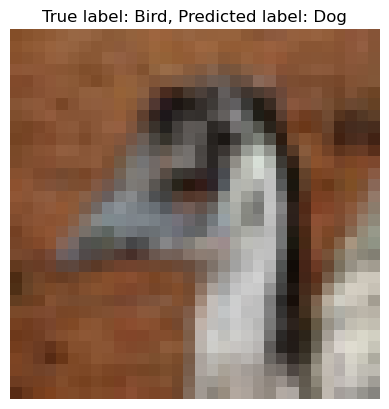

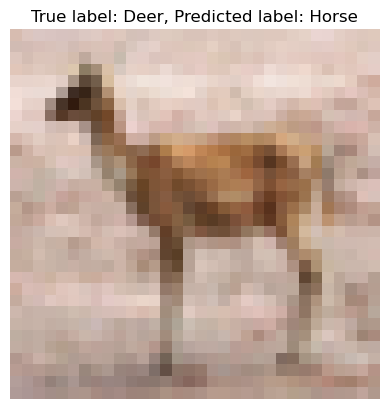

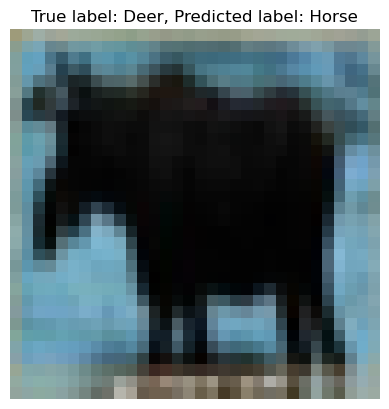

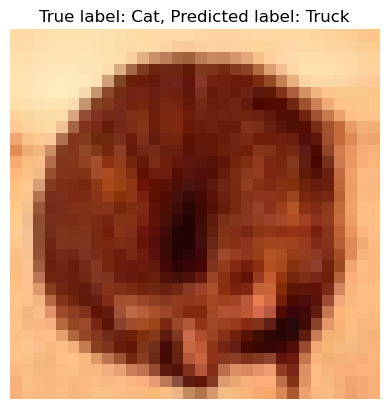

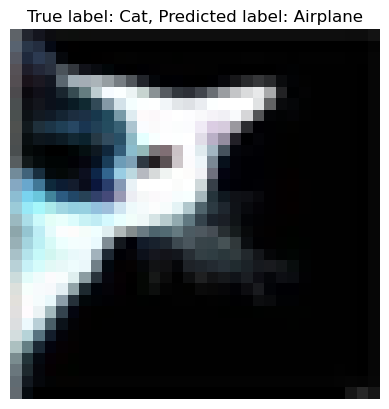

In [26]:
final_plot(incorrect_index)